In [1]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage

In [2]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [3]:
llm = ChatGroq(model="llama-3.1-70b-versatile")

def chat_bot(state:State):
    return {"messages" : [llm.invoke(state["messages"])]}

graph_builder.add_node("chat_bot", chat_bot)
graph_builder.add_edge(START, "chat_bot")
graph_builder.add_edge("chat_bot", END)

graph = graph_builder.compile()

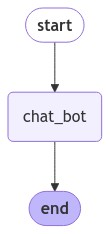

In [4]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [5]:
query = "Hi! I'm Bob."

input_messages = [HumanMessage(query)]
output = graph.invoke({"messages": input_messages})
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hi Bob, it's nice to meet you. Is there something I can help you with or would you like to chat?


In [6]:
output

{'messages': [HumanMessage(content="Hi! I'm Bob.", id='0c1810e8-3e8e-44f4-8ad9-f599326fc1a1'),
  AIMessage(content="Hi Bob, it's nice to meet you. Is there something I can help you with or would you like to chat?", response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 41, 'total_tokens': 67, 'completion_time': 0.104, 'prompt_time': 0.009949275, 'queue_time': 0.005037112, 'total_time': 0.113949275}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_b3ae7e594e', 'finish_reason': 'stop', 'logprobs': None}, id='run-4032f480-a7cd-4573-a2fe-f76dd42f85c1-0', usage_metadata={'input_tokens': 41, 'output_tokens': 26, 'total_tokens': 67})]}

In [7]:
output["messages"][-1]

AIMessage(content="Hi Bob, it's nice to meet you. Is there something I can help you with or would you like to chat?", response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 41, 'total_tokens': 67, 'completion_time': 0.104, 'prompt_time': 0.009949275, 'queue_time': 0.005037112, 'total_time': 0.113949275}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_b3ae7e594e', 'finish_reason': 'stop', 'logprobs': None}, id='run-4032f480-a7cd-4573-a2fe-f76dd42f85c1-0', usage_metadata={'input_tokens': 41, 'output_tokens': 26, 'total_tokens': 67})